<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/BannerUFPR.png" width="700" alt="PPGOLD/PPGMNE Python:INTRO"  />
</p>


# SAOP09 - Data Science For Business
## Prof. Eduardo Pécora

# Curva ROC e Indicadores
Tempo estimado: **60** minutos

## Objetivos

Após completar esta aula, você será capaz de:

* Interpretar uma Curva ROC
* Calcular e interpretar os indicadores de um modelo de classificação

Matriz de Confusão:
 [[74 16]
 [20 70]]
Accuracy: 0.80
Precision: 0.81
Recall: 0.78
F1 Score: 0.80


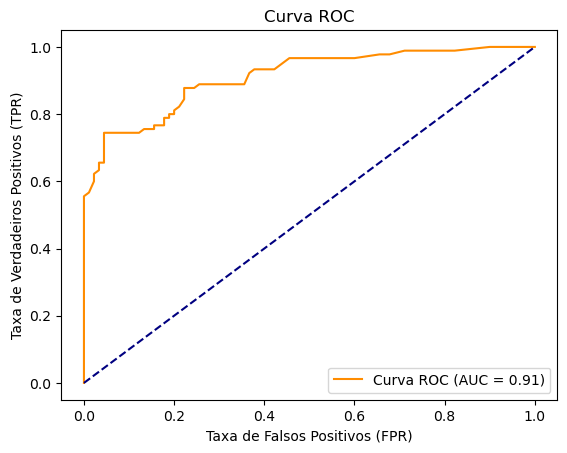

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, auc
)
import matplotlib.pyplot as plt

df = pd.read_excel("https://github.com/EduPekUfpr/PythonProject/blob/main/Dados/H_M_carac.xlsx")

# Convertendo para um DataFrame e transformando a variável target 'sexo' em binária
df['sexo'] = df['sexo'].map({'Homem': 1, 'Mulher': 0})  # Homem = 1, Mulher = 0

# Separando variáveis independentes e dependentes
X = df[['altura', 'peso', 'idade']]
y = df['sexo']

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Treinando o modelo
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Matriz de confusão e métricas
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", conf_matrix)

# Calculando métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Fique Conectado

- [![YouTube](https://img.icons8.com/ios-filled/40/000000/youtube-play.png)](https://www.youtube.com/@LigaDataScience/videos)  
  Explore nossos vídeos educacionais e webinars sobre ciência de dados, machine learning e inteligência artificial. Inscreva-se para não perder nenhuma atualização!

- [![LinkedIn](https://img.icons8.com/ios-filled/40/000000/linkedin.png)](https://www.linkedin.com/company/liga-data-science-ufpr/)  
  Siga-nos no LinkedIn para as últimas novidades, oportunidades de carreira e networking profissional no campo da ciência de dados.

- [![Instagram](https://img.icons8.com/ios-filled/40/000000/instagram-new.png)](https://www.instagram.com/ligadatascience/)  
  Confira nosso Instagram para conteúdos dos bastidores, destaques de eventos e o dia a dia da Liga Data Science. Faça parte da nossa jornada!

## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>, <a href="https://www.linkedin.com/in/joão-gabriel-santin-botelho/" target="_blank">João Gabriel</a>

## Referências:

* Documentação da biblioteca <a href="https://scikit-learn.org/stable/">SciKit Learn</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 28-05-2024       | 1.0     | Eduardo Pecora    | Inicial               |
| 05-11-2024       | 1.1     | João Gabriel    | Demonstração dos modelos               |

<hr>

&copy; Liga Data Science 2024